In [13]:
# BSTPP: Bayesian spatiotemporal point process

In [14]:
# install package
# import sys
# !{sys.executable} -m pip install BSTPP
# GitHub link: https://github.com/imanring/BSTPP/blob/main/README.md

In [1]:
import jax
print("JAX path:", jax.__file__)

JAX path: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jax/__init__.py


In [2]:
## load module
import bstpp
import numpy as np
import numpyro.distributions as dist
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(16)

In [3]:
## load data
from bstpp.main import LGCP_Model, Hawkes_Model, load_Chicago_Shootings, load_Boko_Haram

In [6]:
#load Chicago Shooting data
data = load_Chicago_Shootings()

column_names = ['UNEMP_DENS','MEDINC','MED_HV','assoc_plus','VACANT_DEN',
       'VAC_HU_pct','HCUND20K_L','POP_DENS','CT_SP_WCHI']
model = Hawkes_Model(data['events_2022'],#spatiotemporal points
                     data['boundaries'],#Chicago boundaries
                     365,#Time frame (1 yr)
                     True,#use Cox as background
                     spatial_cov=data['covariates'],#spatial covariate matrix
                     cov_names = column_names,#columns to use from covariates
                     a_0=dist.Normal(1,10), alpha = dist.Beta(20,60),#set priors
                     beta=dist.HalfNormal(2.0),sigmax_2=dist.HalfNormal(0.25)
                    )

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bstpp/main.py:113: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/bstpp/main.py:213: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersect['area'] = intersect.area/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))


In [18]:
data.events_2022()

dict_keys(['events_2022', 'events_2023', 'covariates', 'boundaries'])

In [36]:
# preview data
data["covariates"].head()

,UNEMP_DENS,MEDINC,MED_HV,assoc_plus,OPENperc,VACANT_DEN,VAC_HU_pct,HCUND20K_L,POP_DENS,CT_SP_WCHI,geometry,cov_ind
0,0.063963,35796.11650,244769.5035,0.493141,0.103845,271195.053340,0.090746,187.0,4.630433e+07,0.046107,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",0
1,0.104690,36837.60684,334959.3496,0.474896,0.313313,216494.030596,0.069822,21.0,4.094942e+07,0.097232,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",1
2,0.082740,17216.78622,168463.7068,0.192551,0.024613,265482.354506,0.262734,42.0,1.113540e+07,0.049761,"POLYGON ((-87.6288 41.80189, -87.62879 41.8017...",2
3,0.069500,39110.73826,238617.0213,0.458755,0.032536,430608.293803,0.109300,131.0,4.848968e+07,0.069035,"POLYGON ((-87.60671 41.81681, -87.6067 41.8165...",3
4,0.047852,52336.44860,272848.6647,0.638845,0.184808,66209.952599,0.104290,121.0,6.141842e+07,0.041732,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",4


<Axes: >

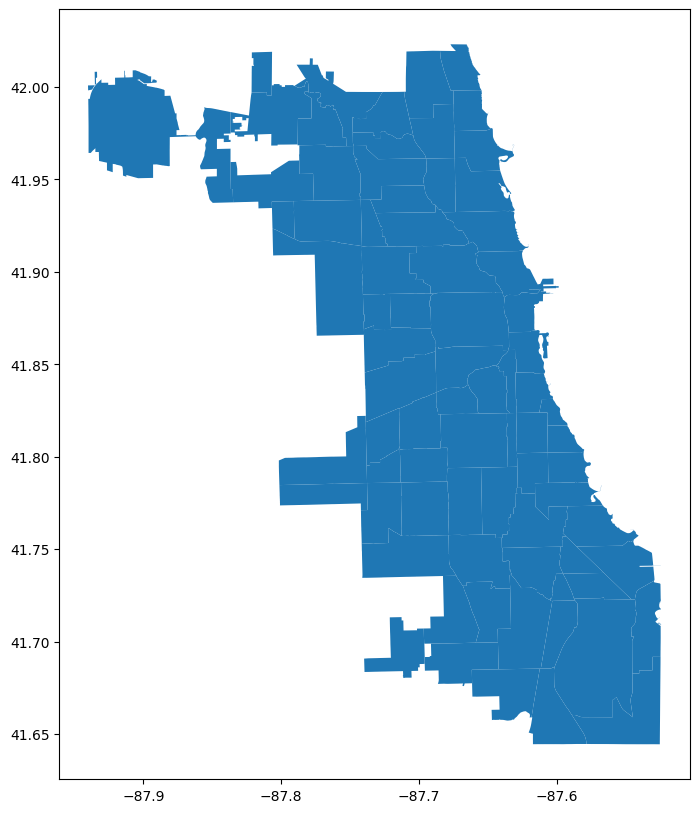

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))

data["boundaries"].plot(ax=ax)
